In [2]:
import numpy as np
from obspy.clients.fdsn import Client
from obspy import UTCDateTime, Stream, read
import datetime
client = Client("IRIS")
%matplotlib inline

In [27]:
# retrieving corrected data from IRIS for the last 10 minutes for KEMF.B1 MN channels

t_start = str((datetime.datetime.utcnow()-datetime.timedelta(minutes=10)).date())+'T'+str((datetime.datetime.utcnow()-datetime.timedelta(minutes=10)).time())
t = str(datetime.datetime.utcnow().date())+'T'+str(datetime.datetime.utcnow().time())
print(t_start)
print(t)
st = Stream()

for channel in ['MNZ','MNE','MNN']:
   # print(channel)
 
    url = 'http://service.iris.edu/irisws/timeseries/1/query?net=NV&sta=KEMF&cha='+channel+'&start='+t_start+'&end='+t+'&scale=AUTO&format=miniseed&loc=B1'

    st.append(read(url)[0])
 

2020-08-28T18:39:32.397416
2020-08-28T18:49:32.397416


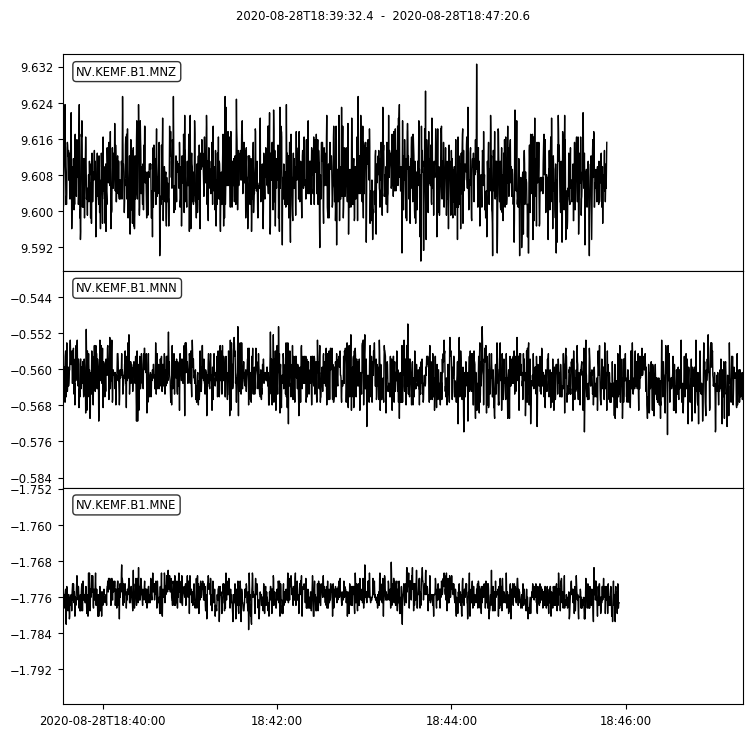

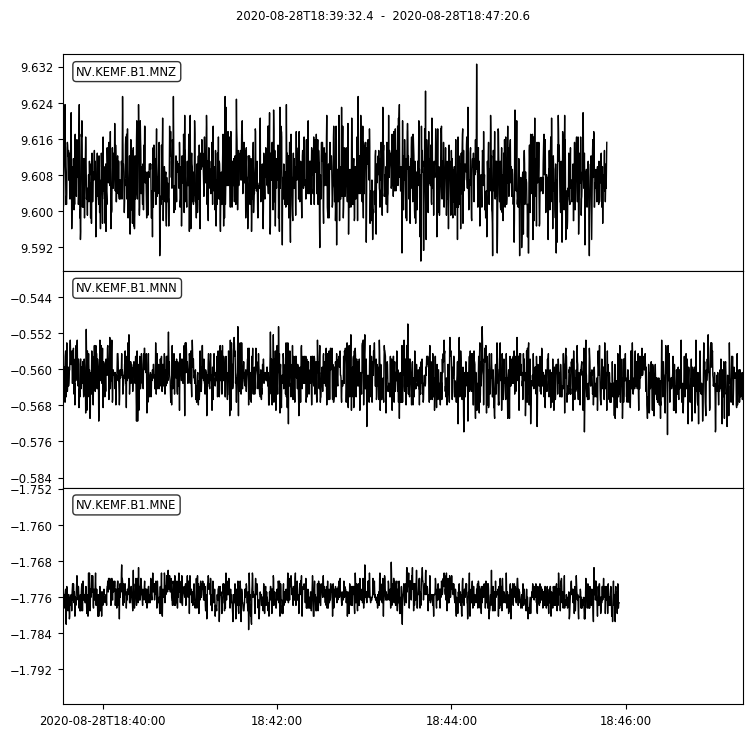

In [28]:
st.plot()

In [5]:
MNZ = np.mean(st.select(channel='MNZ')[0].data)
MNN =  np.mean(st.select(channel='MNN')[0].data)
MNE =  np.mean(st.select(channel='MNE')[0].data)

In [6]:
# absolute acceleration
g = np.sqrt(MNZ**2+MNN**2+MNE**2)
g

9.7866122841144492

In [8]:
# current angles for channels
alpha_N = np.arcsin(MNN/g)*180/np.pi
alpha_E = np.arcsin(MNE/g)*180/np.pi
alpha_Z = np.arccos(MNZ/g)*180/np.pi
print(alpha_Z,alpha_E,alpha_N)

10.9691392367 -10.4553409703 -3.28096660453
